In [42]:
%matplotlib inline

In [119]:
import numpy as np
import pandas as pd

import urllib.request
from pathlib import Path
import matplotlib.pyplot as plt

import scipy
import scipy.stats as stats
import statsmodels.robust as rb
import humanize as hu

In [78]:
print(scipy.__version__)
print(scipy.__numpy_version__)

1.0.0
1.14.1


In [13]:

# ...
# Download the file from `url` and save it locally under `file_name`:
# urllib.request.urlretrieve(url, file_name)

In [14]:
PSDS_PATH = './data/'

def download_from_google_drive(id,fname,path):
    '''
    download_from_google_drive: download data files from Prac. Stats. for Data Science
    
    Downloads a data set, if not already present
    
    Arguments:
    id (string) id of a google drive file to append to google drive url
    fname (string) name of data set, used to save to local drive
    path (string) path to save file to
    
    Outputs:
    Reports if file present, or if download is needed
    
    Returns:
    None
    '''
    
    dest = PSDS_PATH+fname
    url = "https://drive.google.com/uc?export=download&id="+id
    
    my_file = Path(dest)
    if(my_file.exists()):
        print(dest+' already present')
    else:
        
        print('Downloading ',id, ' to: ',dest)
        urllib.request.urlretrieve(url, dest)
    #end if
    return None
#end download_from_google_drive

In [15]:

## Import state data
download_from_google_drive(id="0B98qpkK5EJembFc5RmVKVVJPdGc", fname='state.csv', path=PSDS_PATH)

./data/state.csv already present


In [16]:


## Airline data
download_from_google_drive(id="0B98qpkK5EJemcmZYX2VhMHBXelE", fname='dfw_airline.csv', path=PSDS_PATH)
download_from_google_drive(id="0B98qpkK5EJemMzZYZHZJaF9va0U", fname='airline_stats.csv', path=PSDS_PATH)

## Import stock data
download_from_google_drive('0B98qpkK5EJemV2htZWdhVFRMNlU', fname='sp500_px.csv', path=PSDS_PATH)
download_from_google_drive('0B98qpkK5EJemY0U0N1N6a21lUzA', fname='sp500_sym.csv', path=PSDS_PATH)

## Import KC housing tax data
download_from_google_drive('0B98qpkK5EJemck5VWkszN3F3RGM', fname='kc_tax.csv', path=PSDS_PATH)

## Import lending club loan data
download_from_google_drive('0B98qpkK5EJemRXpfa2lONlFRSms', fname='lc_loans.csv', path=PSDS_PATH)
download_from_google_drive('1J96vAqyh92VIeh7kBFm1NBfZcvx8wp2s', fname='full_train_set.csv', path=PSDS_PATH)

## Import a sample of 200 records from lending club loan data
download_from_google_drive('0B98qpkK5EJemd0JnQUtjb051dTA', fname='loan200.csv', path=PSDS_PATH)

## Import a sample of 3000 records from lending club loan data
download_from_google_drive('0B98qpkK5EJemQXYtYmJUVkdsN1U', fname='loan3000.csv', path=PSDS_PATH)


## Import a complete set of records from lending club loan data
download_from_google_drive('0B98qpkK5EJemZzdoQ2I3SWlBYzg', fname='loan_data.csv', path=PSDS_PATH)

## Import loans income data
download_from_google_drive('0B98qpkK5EJemRXVld0NSbWhYNVU', fname='loans_income.csv', path=PSDS_PATH)

## Import session_times data
download_from_google_drive('0B98qpkK5EJemOC0xMHBTTEowYzg', fname='web_page_data.csv', path=PSDS_PATH)

## Import four_sessions data
download_from_google_drive('0B98qpkK5EJemOFdZM1JsaEF0Mnc', fname='four_sessions.csv', path=PSDS_PATH)

## Import click_rate data
download_from_google_drive('0B98qpkK5EJemVHB0ZzdtUG9SeTg', fname='click_rates.csv', path=PSDS_PATH)

## Import imanishi data
download_from_google_drive('0B98qpkK5EJemZTJnUDd5Ri1vRDA', fname='imanishi_data.csv', path=PSDS_PATH)

## Import lung disease data
download_from_google_drive('0B98qpkK5EJemb25YYUFJZnZVSnM', fname='LungDisease.csv', path=PSDS_PATH)

## Import Zillow's county level ZHVI 
download_from_google_drive('0B98qpkK5EJemWGRWOEhYN1RabVk', fname='County_Zhvi_AllHomes.csv', path=PSDS_PATH)

## Import King county house sales data
download_from_google_drive('0B98qpkK5EJemVTRRN0dLakxwTmM', fname='house_sales.csv', path=PSDS_PATH)

./data/dfw_airline.csv already present
./data/airline_stats.csv already present
./data/sp500_px.csv already present
./data/sp500_sym.csv already present
./data/kc_tax.csv already present
./data/lc_loans.csv already present
./data/full_train_set.csv already present
./data/loan200.csv already present
./data/loan3000.csv already present
./data/loan_data.csv already present
./data/loans_income.csv already present
./data/web_page_data.csv already present
./data/four_sessions.csv already present
./data/click_rates.csv already present
./data/imanishi_data.csv already present
./data/LungDisease.csv already present
./data/County_Zhvi_AllHomes.csv already present
./data/house_sales.csv already present


In [36]:
murder = np.genfromtxt(PSDS_PATH+'state.csv', delimiter=',', deletechars='"', \
                       dtype=['U15','i4','f4','U15'], encoding='ascii', skip_header=1, names=['Name', 'Pop', 'MR', 'Code'])

In [37]:
murder[0:10]

array([('"Alabama"',  4779736, 5.7, '"AL"'),
       ('"Alaska"',   710231, 5.6, '"AK"'),
       ('"Arizona"',  6392017, 4.7, '"AZ"'),
       ('"Arkansas"',  2915918, 5.6, '"AR"'),
       ('"California"', 37253956, 4.4, '"CA"'),
       ('"Colorado"',  5029196, 2.8, '"CO"'),
       ('"Connecticut"',  3574097, 2.4, '"CT"'),
       ('"Delaware"',   897934, 5.8, '"DE"'),
       ('"Florida"', 18801310, 5.8, '"FL"'),
       ('"Georgia"',  9687653, 5.7, '"GA"')],
      dtype=[('Name', '<U15'), ('Pop', '<i4'), ('MR', '<f4'), ('Code', '<U15')])

In [32]:
murder[-5:]

array([('"Virginia"', 8001024, 4.1, '"VA"'),
       ('"Washington"', 6724540, 2.5, '"WA"'),
       ('"West Virginia"', 1852994, 4. , '"WV"'),
       ('"Wisconsin"', 5686986, 2.9, '"WI"'),
       ('"Wyoming"',  563626, 2.7, '"WY"')],
      dtype=[('f0', '<U15'), ('f1', '<i4'), ('f2', '<f4'), ('f3', '<U15')])

In [45]:
murder['Name'][0:10]

array(['"Alabama"', '"Alaska"', '"Arizona"', '"Arkansas"', '"California"',
       '"Colorado"', '"Connecticut"', '"Delaware"', '"Florida"',
       '"Georgia"'], dtype='<U15')

In [40]:
murder['Pop']

array([ 4779736,   710231,  6392017,  2915918, 37253956,  5029196,
        3574097,   897934, 18801310,  9687653,  1360301,  1567582,
       12830632,  6483802,  3046355,  2853118,  4339367,  4533372,
        1328361,  5773552,  6547629,  9883640,  5303925,  2967297,
        5988927,   989415,  1826341,  2700551,  1316470,  8791894,
        2059179, 19378102,  9535483,   672591, 11536504,  3751351,
        3831074, 12702379,  1052567,  4625364,   814180,  6346105,
       25145561,  2763885,   625741,  8001024,  6724540,  1852994,
        5686986,   563626])

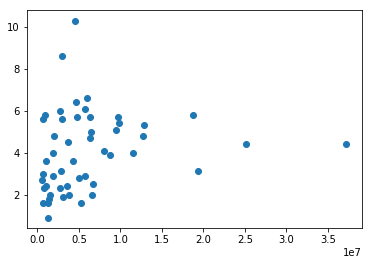

In [44]:
plt.scatter(x=murder['Pop'], y=murder['MR'])

In [47]:
stats.describe(murder['Pop'])

DescribeResult(nobs=50, minmax=(563626, 37253956), mean=6162876.3, variance=46898327373394.445, skewness=2.5626855429174094, kurtosis=7.756338866239435)

In [49]:
stats.trim_mean(murder['Pop'], 0.1)

4783697.125

In [57]:
print(hu.intword(6162876))
print(hu.intword( stats.trim_mean(murder['Pop'], 0.1)))



6.2 million
4.8 million


In [65]:
[hu.intword(stats.trim_mean(murder['Pop'], x/100.0)) for x in range(1,31)]

['6.2 million',
 '5.6 million',
 '5.6 million',
 '5.3 million',
 '5.3 million',
 '5.1 million',
 '5.1 million',
 '4.9 million',
 '4.9 million',
 '4.8 million',
 '4.8 million',
 '4.7 million',
 '4.7 million',
 '4.6 million',
 '4.6 million',
 '4.5 million',
 '4.5 million',
 '4.5 million',
 '4.5 million',
 '4.4 million',
 '4.4 million',
 '4.4 million',
 '4.4 million',
 '4.3 million',
 '4.3 million',
 '4.3 million',
 '4.3 million',
 '4.4 million',
 '4.4 million',
 '4.4 million']

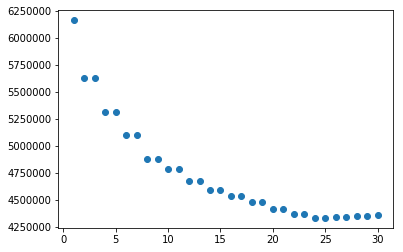

In [68]:
plt.scatter(x=range(1,31), y= [stats.trim_mean(murder['Pop'], x/100.0) for x in range(1,31)])

In [69]:
stats.trim_mean(murder['Pop'], 0.1) 

4783697.125

In [80]:
hu.intword(np.median(murder['Pop']))

'4.4 million'

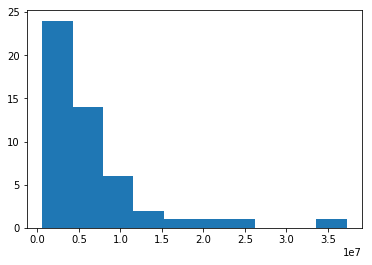

In [83]:
plt.hist(murder['Pop'], bins=10);

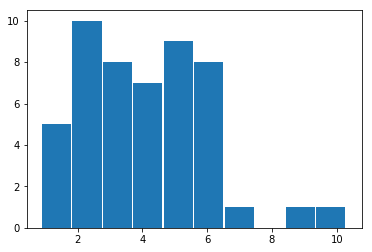

In [85]:
plt.hist(murder['MR'], bins=10, width=0.9);

In [88]:
hu.intword(stats.mstats.median_cihs(murder['Pop'])[0]), hu.intword(stats.mstats.median_cihs(murder['Pop'])[1])

('2.9 million', '5.8 million')

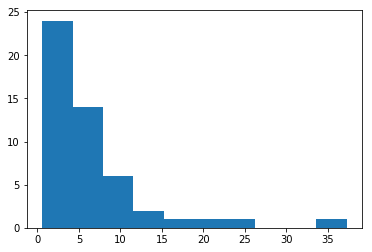

In [98]:
plt.hist(murder['Pop']/1_000_000);

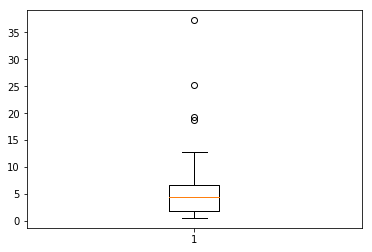

In [103]:
plt.boxplot(murder['Pop']/1_000_000);

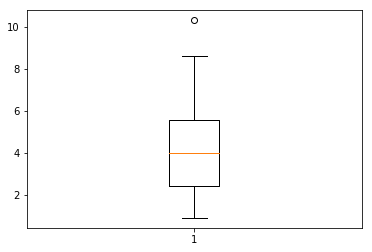

In [102]:
plt.boxplot(murder['MR']);

In [105]:
np.median(murder['Pop'])

4436369.5

In [106]:
x = stats.describe(murder['Pop'])
x

DescribeResult(nobs=50, minmax=(563626, 37253956), mean=6162876.3, variance=46898327373394.445, skewness=2.5626855429174094, kurtosis=7.756338866239435)

In [107]:
x.variance

46898327373394.445

In [108]:
std = np.sqrt(x.variance)

In [109]:
std

6848235.347401142

In [111]:
np.std(murder['Pop'])*np.sqrt(50/49)

6848235.347401144

In [112]:
stats.iqr(murder['Pop'])

4847308.0

In [120]:
rb.mad(murder['Pop'])


3849876.1459979336